<a href="https://colab.research.google.com/github/LilyBouldin/cosc470s24/blob/main/Copy_of_FastNeuralNetwork_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The **Hello, world** of neural networks
This code builds a simple neural network that can recognize handwritten 28x28 pixel digits.

Our first version will have 15 neurons in the hidden layer and 10 output neurons.

See image below:
http://neuralnetworksanddeeplearning.com/images/tikz12.png

How many weights in this network?
11760 weights in the first layer (784 * 15) and 150 weights in the second layer (15 * 10) = 11910 weights total
15 biases in the hidden layer and 10 biases in the output layer = 25 biases total.
11910 + 25 = 11935 parameters!

In [21]:
!git clone https://github.com/MichalDanielDobrzanski/DeepLearningPython nn
%cd nn

Cloning into 'nn'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 63 (delta 1), reused 3 (delta 0), pack-reused 55
Receiving objects: 100% (63/63), 16.43 MiB | 22.87 MiB/s, done.
Resolving deltas: 100% (28/28), done.
/content/nn/nn/nn


In [22]:
# this code depends on having executed the previous cell
# (i.e., you need to have cloned the nn code and cd'ed into it)
import network
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)
test_data = list(test_data)


In [23]:
import numpy as np
print(np.shape(training_data))
print(np.shape(training_data[0][0]))
print(np.shape(training_data[0][1]))
print(training_data[0][1])

(50000, 2)
(784, 1)
(10, 1)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [24]:
# average digit darkness
# step 1 - write a function that can calculate the darkness of a single image
def image_darkness(imgpixeldata):
  darkness_total = 0
  for x in imgpixeldata:
    darkness_total = darkness_total + x
  return darkness_total[0]

# step 2 - call that function on all the training images and calculate the average darkness of each digit
darkness = image_darkness(training_data[0][0])
whichimage = np.argmax(training_data[0][1])
print(f"The first image was a {whichimage} and its darkness was {darkness}")
darkness = image_darkness(training_data[1][0])
whichimage = np.argmax(training_data[1][1])
print(f"The second image was a {whichimage} and its darkness was {darkness}")

#np.argmax finds the index of the maximum value, which would return 10

# define a 10-element list of darkness totals
darkness_totals = [0 for _ in range(10)]
# define a 10-elment list of digit counts
darkness_counts = [0 for _ in range(10)]

# iterate through each image and update the two data structures
for training_img in training_data:
  darkness = image_darkness(training_img[0]) # replace this with the correct function call!
  whichimage = np.argmax(training_img[1])
  darkness_totals[whichimage] += darkness
  darkness_counts[whichimage] += 1

# now calculate the averages
darkness_averages = [darkness_totals[i]/darkness_counts[i] for i in range(10)]

print(darkness_counts)
print(darkness_averages)

# step 3 - use those averages to classify all the test data images and count how many of each digit you get right
def find_closest(darkness, darkness_averages):
  # add code here that determines which average was closest to darkness
  closest_index = min(range(len(darkness_averages)), key=lambda i: abs(darkness_averages[i]- darkness))

  return closest_index

correct_counts = [0 for _ in range(10)]
wrong_counts = [0 for _ in range(10)]

for imgdata, whichimage in test_data:
  darkness = image_darkness(imgdata)
  # see which darkness_average is closest to "darkness" and make that our classification for this image
  closest_digit = find_closest(darkness, darkness_averages)
  if closest_digit == whichimage:
    correct_counts[whichimage] += 1
  else:
    wrong_counts[whichimage] += 1

# now that we have our correct/wrong counts, turn that into accuracies
digit_accuracies = [correct_counts[i]/(correct_counts[i]+wrong_counts[i]) for i in range(10)]
print(digit_accuracies)

The first image was a 5 and its darkness was 107.51953125
The second image was a 0 and its darkness was 121.46484375
[4932, 5678, 4968, 5101, 4859, 4506, 4951, 5175, 4842, 4988]
[135.8691200324412, 59.66034750352237, 116.294303857186, 110.87092451235051, 95.22073970338548, 100.34646166222814, 107.38312020298929, 89.8788345410628, 117.88056410703221, 96.0455585592923]
[0.5418367346938775, 0.8290748898678414, 0.04844961240310078, 0.048514851485148516, 0.048879837067209775, 0.0795964125560538, 0.06576200417536535, 0.28793774319066145, 0.13655030800821355, 0.04261645193260654]


In [25]:
print(np.shape(test_data))
print(np.shape(test_data[0]))
print(test_data[0][1])


(10000, 2)
(2,)
7


In [26]:
# part 2 - use this default configuration and the following hyper-parameters
#    epochs - 30
#    batch size - 10
#    learning rate - 3.0
net = network.Network([784, 30, 10])
net.SGD(training_data, 5, 10, 3.0, test_data=test_data)


Epoch 0 : 9021 / 10000
Epoch 1 : 9201 / 10000
Epoch 2 : 9304 / 10000
Epoch 3 : 9319 / 10000
Epoch 4 : 9346 / 10000


In [27]:
find_closest(darkness, darkness_averages)

0

In [28]:
import numpy as np
a = net.feedforward(test_data[2][0])
print(a)
print(np.argmax(a))
print(test_data[2][1])

# per digit accuracies
# loop through the test data again
# calculate how many of each digit was classified correctly

correct_counts = [0 for _ in range(10)]
digit_counts = [0 for _ in range(10)]

for (x, y) in test_data:
  a = np.argmax(net.feedforward(x))
  if a == y:
    correct_counts[y] += 1
  digit_counts[y] += 1

print(correct_counts)
print(digit_counts)
accuracies = [correct_counts[i]/digit_counts[i] for i in range(10)]
print(accuracies)

[[1.75337408e-08]
 [9.98540588e-01]
 [1.12218653e-03]
 [1.24539466e-03]
 [1.09803913e-06]
 [1.84307161e-04]
 [1.52916787e-03]
 [8.47381497e-06]
 [1.57844313e-03]
 [5.75984736e-05]]
1
1
[958, 1110, 958, 944, 930, 760, 914, 958, 908, 906]
[980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]
[0.9775510204081632, 0.9779735682819384, 0.9282945736434108, 0.9346534653465347, 0.9470468431771895, 0.852017937219731, 0.954070981210856, 0.9319066147859922, 0.9322381930184805, 0.8979187314172448]


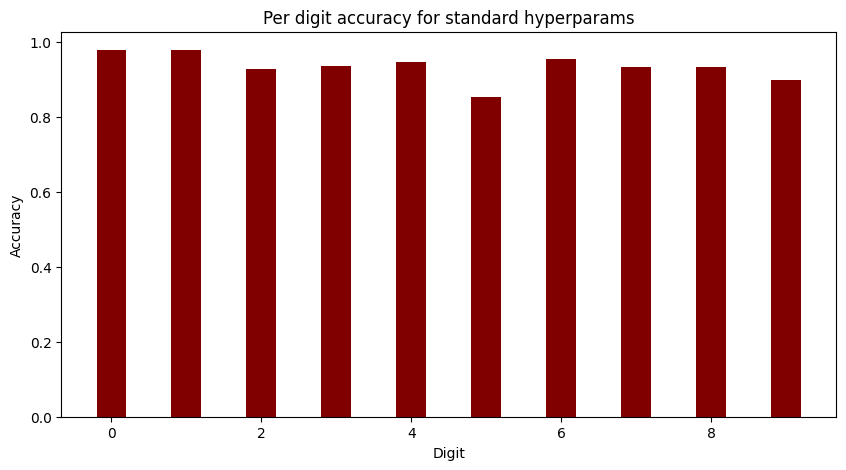

In [29]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))
 # creating the bar plot
plt.bar(range(0,10), accuracies, color ='maroon',
        width = 0.4)
plt.xlabel("Digit")
plt.ylabel("Accuracy")
plt.title("Per digit accuracy for standard hyperparams")
plt.show()

In [30]:
print(np.shape(net.weights[0]))
print(net.weights[0])

(30, 784)
[[-0.60958674 -0.0865174   0.3284175  ...  0.15786487  1.06631047
   0.58397795]
 [-0.01994677  0.28184096  0.19731598 ...  1.15657747 -0.36706533
  -0.10491543]
 [ 0.96412226 -0.09212673 -0.25954087 ...  0.47865039  1.4157626
   0.06109503]
 ...
 [-0.30027843 -0.18595581  0.70876953 ...  1.32224738  0.52727775
   0.69027101]
 [ 0.98169759  0.01135263 -0.18664791 ... -0.41550301  0.0187504
  -1.13013705]
 [ 2.30967295 -0.7214351   0.00345056 ... -1.69182286  2.14512092
   1.00027855]]


In [31]:
print(np.shape(net.weights[1]))
print(net.weights[1])

(10, 30)
[[-0.43694461 -2.8251481  -0.54423504 -2.34567508 -1.58133346  0.74471228
   0.40614714 -2.29718792 -3.79261643  1.5522701  -2.53343905 -2.83364135
  -0.916446   -1.71543881  1.65101566 -1.81714041  3.29933961  0.32602743
  -1.21124346 -1.19007831  3.35830144  1.48065797 -0.51763893  1.06629664
  -1.48865263 -2.68062008 -1.61897618  2.22724647 -1.15330795 -2.85362737]
 [ 1.90890367  1.89744895  3.53780161  1.42371692 -1.61379178 -1.96149736
  -2.20237189 -1.884352    1.30400244 -0.65302684 -2.72040591  0.51909535
  -2.36430016 -1.64496942  4.46109764 -1.69149667 -0.370092   -1.55268349
  -0.63098952 -1.32315526 -1.8614026  -1.78743229  1.28073371 -2.38950795
  -1.7132644   2.08830072 -1.41682812 -1.4609895   1.51178153 -2.51013869]
 [-1.42103961  2.68982421 -0.64491325  1.03781455 -2.32515691  0.64873684
   1.23493071 -4.11425534  2.08938829 -0.71243749 -1.06227812 -1.03607611
  -4.98792827 -2.97507336 -2.75934346 -1.38932867 -0.18717331  1.76974802
   4.5561607  -2.70837893  

In [32]:
# part 3 - experiment with different hyper parameters
#  epochs - 5, 15, 30, 60 (batch size 10, learning 3.0)
#  batch - 5, 10, 50, 100 (epochs 30, learning 3.0)
#  learning rate - 1.0, 3.0, 5.0 (epochs 30, batch size 10)